# CSE 475 Final Project Milestone 1: Data Preperation

Overview:

This Jupyter Notebook provides Exploratory Data Analysis (EDA), Data Cleaning, and Feature Engineering on the dataset [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction). There are 918 observations, with 12 attributes(variables).

In [566]:
#set up the environment
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)
for file in os.listdir(path):
    print(file)
csv_path = os.path.join(path, "heart.csv")

Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1
heart.csv


#Step 1: Exploratory Data Analysis



##Part 1: Initial Dataset Overview

load the data and provide the information for the first few rows

In [567]:
read_csv = pd.read_csv(csv_path)
df = pd.DataFrame(read_csv)

In [568]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [569]:
df.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


This dataset contains 918 observations of patients, it predicts the likelihood of heart disease based on clinical and lifestyle variables. It has following features(variables):


*   Age: Numerical
*   Sex: Categorical
*   ChestPainType: Categorical
*   RestingBP: Numerical
*   Cholesterol: Numerical
*   FastingBS:  Categorical
*   RestingECG: Categorical
*   MaxHR: Numerical
*   ExerciseAngina: Categorical
*   Oldpeak: Numerical
*   ST_Slope: Numerical
*   HeartDisease: Categorical

##Part 2: Univariate Analysis

In [571]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


###Age

In [572]:
df['Age'].describe()

,Age
count,918.000000
mean,53.510893
std,9.432617
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


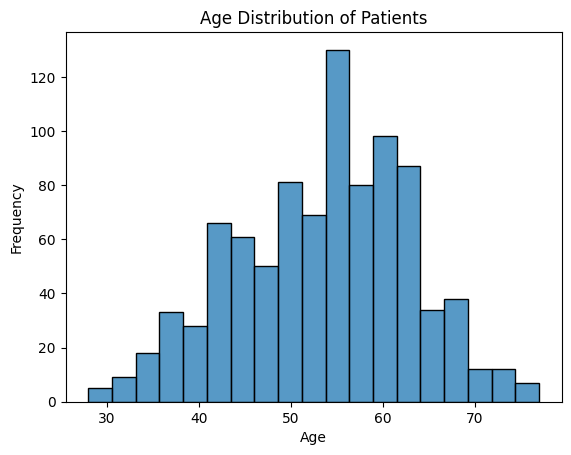

In [573]:
#Histogram for Age
sns.histplot(data=df, x='Age', kde=False)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The patient ages range from roughly 28 to 77 years, with a slightly right-skewed distribution. Most patients are between 50 and 60 years old, reflecting a middle-aged cohort typical for cardiovascular studies.

###Sex


*   F = female
*   M = male



In [574]:
#Count for Sex, F = female, M = male
df['Sex'].value_counts()

,count
Sex,
M,725
F,193


<Axes: xlabel='Sex'>

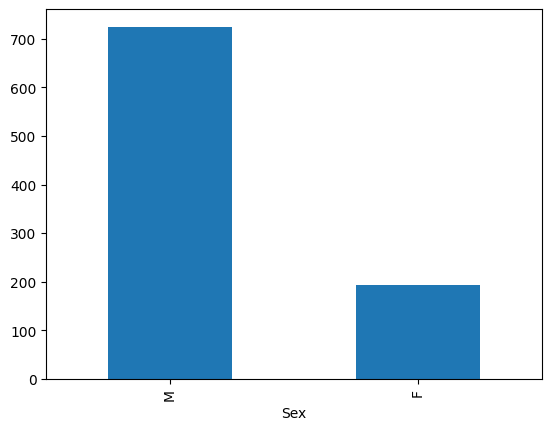

In [575]:
# bar plot for Sex
df['Sex'].value_counts().plot(kind='bar')

Males represent a larger proportion of the sample, suggesting a slightly male-dominant dataset.

###ChestPainType
*  TA: Typical Angina
*  ATA: Atypical Angina,
*  NAP: Non-Anginal Pain,
*  ASY: Asymptomatic

In [576]:
# Count for ChestPainType
df['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


<Axes: xlabel='ChestPainType'>

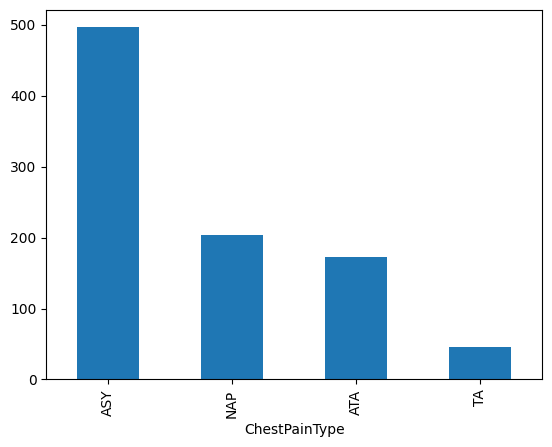

In [577]:
# Bar plot for ChestPainType
df['ChestPainType'].value_counts().plot(kind='bar')

The majority of patients are asymptomatic (ASY) or have non-anginal pain (NAP), indicating many cases were detected through screening or atypical symptoms.

###Resting BP

In [578]:
df['RestingBP'].describe()

,RestingBP
count,918.000000
mean,132.396514
std,18.514154
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


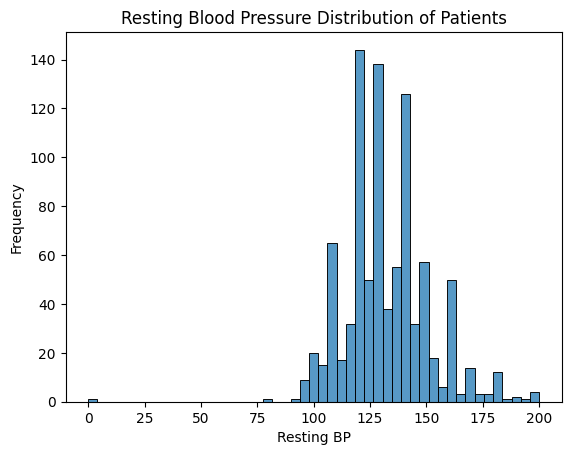

In [579]:
# histogram for RestingBP
sns.histplot(data=df, x='RestingBP', kde=False)
plt.title('Resting Blood Pressure Distribution of Patients')
plt.xlabel('Resting BP')
plt.ylabel('Frequency')
plt.show()

In [580]:
df[df['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


Resting blood pressure clusters around 120–140 mmHg, with a few outliers above 160 mmHg indicating hypertensive individuals.

###Cholesterol

In [581]:
df['Cholesterol'].describe()

,Cholesterol
count,918.000000
mean,198.799564
std,109.384145
min,0.000000
25%,173.250000
50%,223.000000
75%,267.000000
max,603.000000


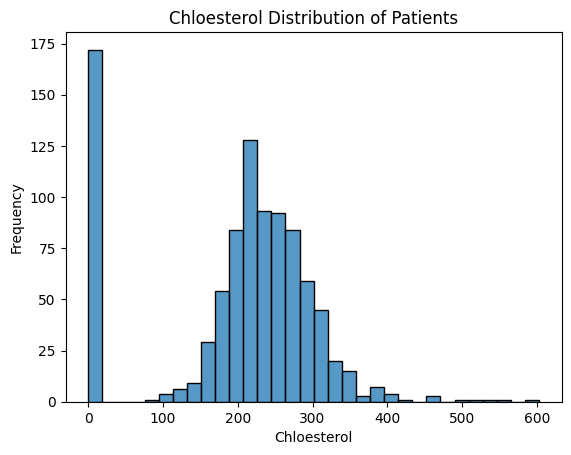

In [582]:
# histogram for Cholesterol
sns.histplot(data=df, x='Cholesterol', kde=False)
plt.title('Chloesterol Distribution of Patients')
plt.xlabel('Chloesterol')
plt.ylabel('Frequency')
plt.show()

In [583]:
df[df['Cholesterol']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [584]:
df[df['Cholesterol'] >= 400]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
182,52,M,ASY,140,404,0,Normal,124,Y,2.0,Flat,1
250,44,M,ASY,135,491,0,Normal,135,N,0.0,Flat,1
496,58,M,ASY,132,458,1,Normal,69,N,1.0,Down,0
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


Cholesterol levels show a wide spread with many are 0 and some are extreme high values (> 500 mg/dL), suggesting potential outliers. The distribution is positively skewed.

###Fasting blood Sugar

*  1: if FastingBS > 120 mg/dl
*  0: otherwise

In [585]:
# counts for FastingBS
df['FastingBS'].value_counts()

,count
FastingBS,
0,704
1,214


<Axes: xlabel='FastingBS'>

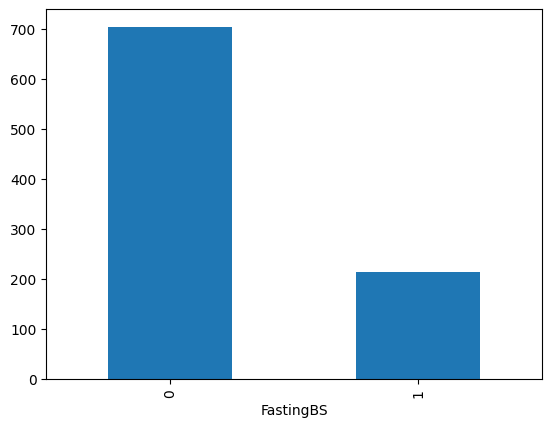

In [586]:
# bar plot for FastingBS
df['FastingBS'].value_counts().plot(kind='bar')

Only a small proportion have elevated fasting blood sugar (> 120 mg/dL).

###RestingECG


* Normal: Normal,
* ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),
* LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria



In [587]:
# count for RestingECG
df['RestingECG'].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


<Axes: xlabel='RestingECG'>

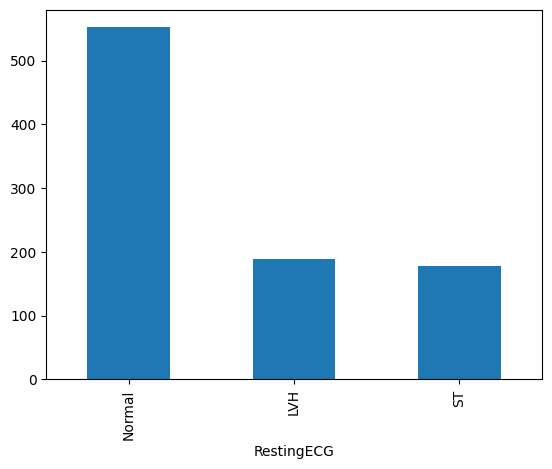

In [588]:
# Bar plot for RestingECG
df['RestingECG'].value_counts().plot(kind='bar')

Most results are normal, while a minority show ST-T abnormalities or LVH.

###MaxHR

In [589]:
df['MaxHR'].describe()

,MaxHR
count,918.000000
mean,136.809368
std,25.460334
min,60.000000
25%,120.000000
50%,138.000000
75%,156.000000
max,202.000000


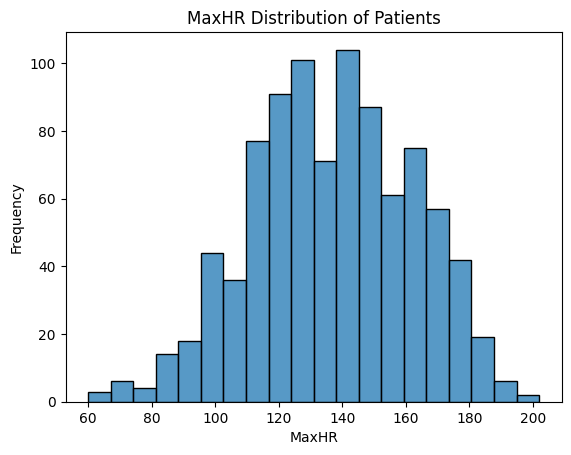

In [590]:
# histogram for MaxHR
sns.histplot(data=df, x='MaxHR', kde=False)
plt.title('MaxHR Distribution of Patients')
plt.xlabel('MaxHR')
plt.ylabel('Frequency')
plt.show()

Maximum heart rate achieved (MaxHR) ranges from 60 to 202 bpm, approximately normal with a peak near 150 bpm. This variable tends to decline with age, as confirmed in bivariate analysis.

###ExerciseAngina
* N: No
* Y: Yes

In [591]:
# counts for ExerciseAngina
df['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
N,547
Y,371


<Axes: xlabel='ExerciseAngina'>

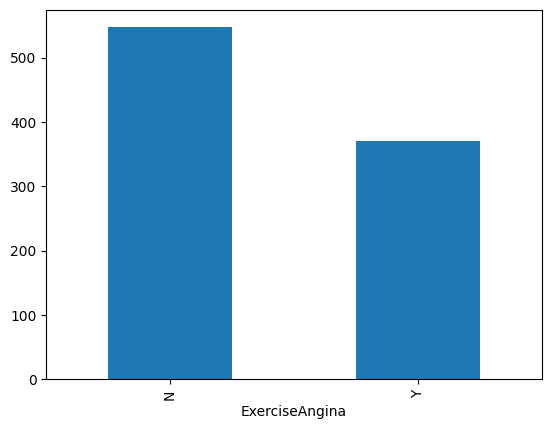

In [592]:
# bar plot for ExerciseAngina
df['ExerciseAngina'].value_counts().plot(kind='bar')

Around half of patients report exercise-induced angina, which aligns with heart disease prevalence.

###OldPeak

In [593]:
df['Oldpeak'].describe()

,Oldpeak
count,918.000000
mean,0.887364
std,1.066570
min,-2.600000
25%,0.000000
50%,0.600000
75%,1.500000
max,6.200000


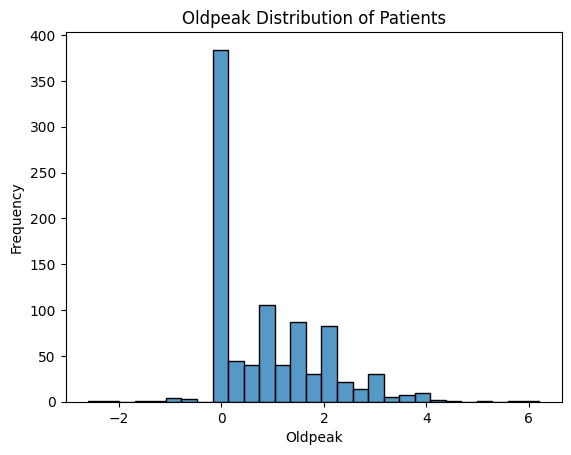

In [594]:
# histogram for Oldpeak
sns.histplot(data=df, x='Oldpeak', kde=False)
plt.title('Oldpeak Distribution of Patients')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.show()

The Oldpeak variable (ST depression) is right-skewed, with most patients near 0 and a few higher-risk individuals exceeding 3.0.

###ST_Slope
* Up: upsloping
* Flat: flat
* Down: downsloping

In [595]:
# counts for ST_Slope
df['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


<Axes: xlabel='ST_Slope'>

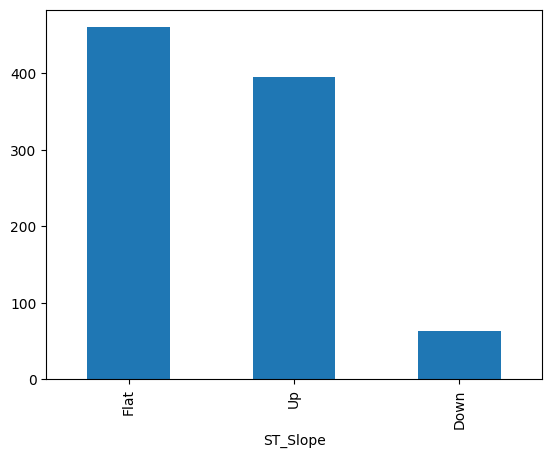

In [596]:
# bar plot for ST_Slope
df['ST_Slope'].value_counts().plot(kind='bar')

The “Flat” and “Up” slopes dominate; “Down” slope is less frequent but often associated with disease risk.

###HeartDisease
* 1: heart disease
* 0: Normal

In [597]:
# counts for HeartDisease
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


<Axes: xlabel='HeartDisease'>

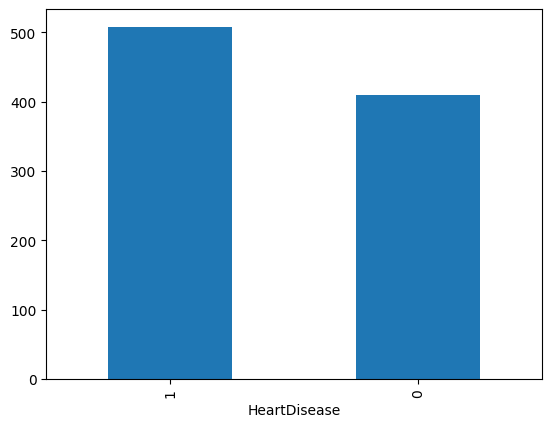

In [598]:
# bar plot for HeartDisease, 1: heart disease, 0: Normal
df['HeartDisease'].value_counts().plot(kind='bar')

The dataset is slightly imbalanced, with more patients labeled 1 (heart disease) than 0 (normal).

##Part 3: Bivariate Analysis

###Correlation Matrix for numerical variables

In [599]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
print(correlation_matrix)

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  


The correlation matrix shows several moderate relationships. Age and MaxHR are inversely correlated (r ≈ –0.39). MaxHR and Oldpeak both show meaningful associations with HeartDisease (r ≈ –0.40 and r ≈ +0.40, respectively). Other features display weaker correlations (< 0.3), indicating a mix of independent predictors that may each contribute unique information to a predictive model.

### All Pairwise Scatterplots

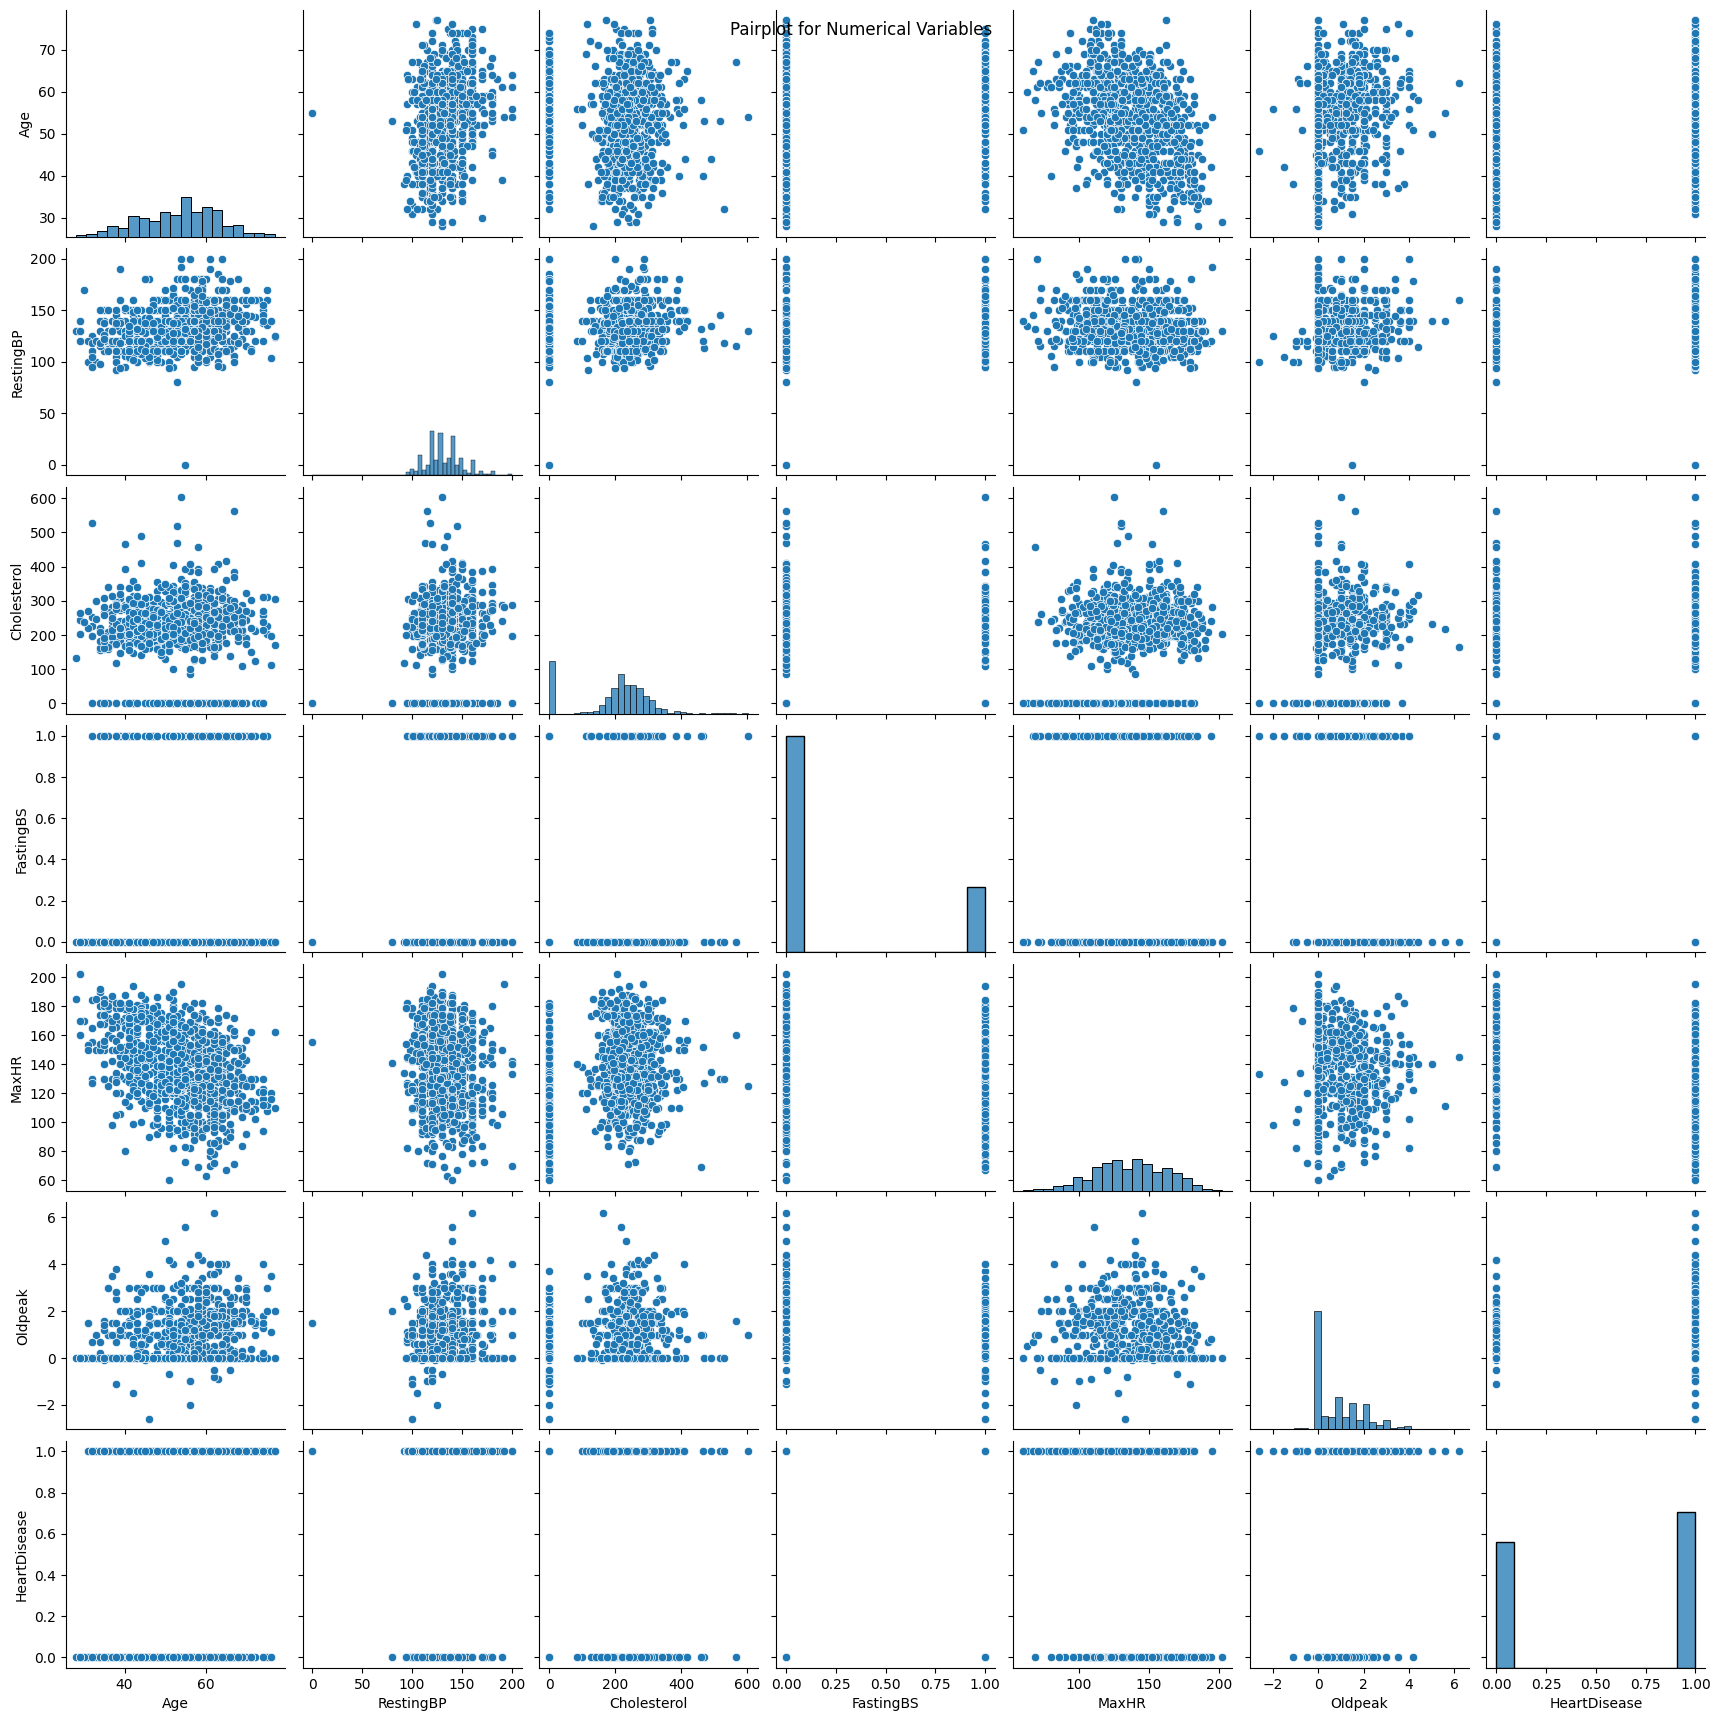

In [600]:
sns.pairplot(df)
plt.suptitle('Pairplot for Numerical Variables')
plt.show()

From the correlation matrix and the scatterplots, there are some pairs that has somewhat stronger correlations than others (anything that has a greater magnitude than 0.3, or likely to have a linear regression):

* Age vs MaxHR
* MaxHR vs. HeartDisease
* Oldpeak vs. HearDisease

### Age vs MaxHR

In [601]:
df.loc[:,['Age','MaxHR']].corr()

,Age,MaxHR
Age,1.000000,-0.382045
MaxHR,-0.382045,1.000000


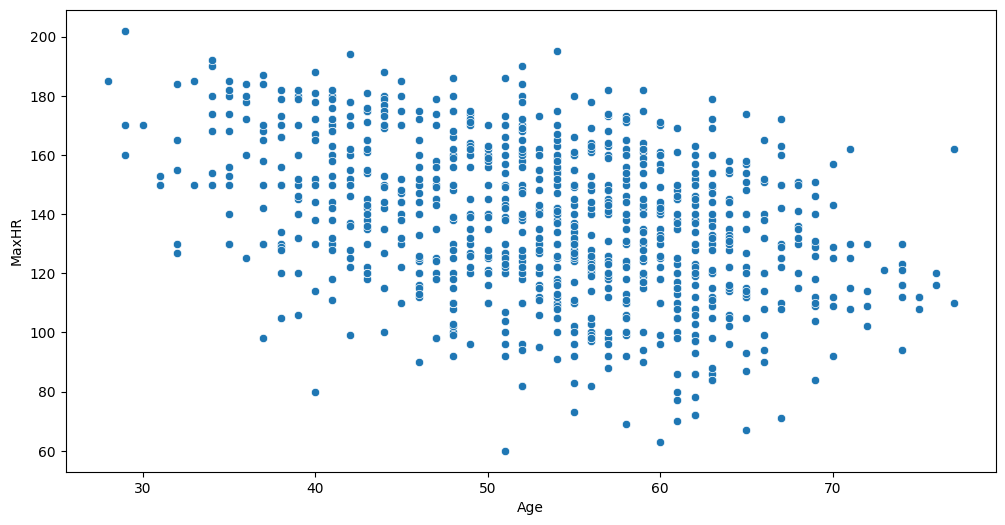

In [602]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age', y='MaxHR')
plt.show()

The scatterplot shows a clear negative relationship between Age and MaxHR (correlation ≈ –0.39). Older patients tend to achieve lower maximum heart rates during exercise, consistent with physiological expectations.

### MaxHR vs HeartDisease

In [603]:
df.groupby('HeartDisease')['MaxHR'].mean()

,MaxHR
HeartDisease,
0,148.151220
1,127.655512


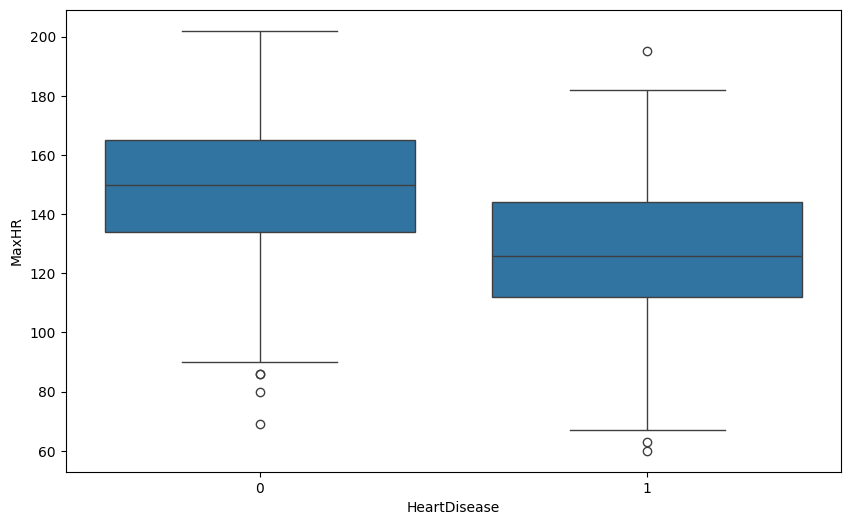

In [604]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='HeartDisease', y='MaxHR')
plt.show()

Patients diagnosed with heart disease generally exhibit lower MaxHR values (median ≈ 130 bpm) compared to those without disease (median ≈ 160 bpm). This supports the idea that limited cardiac response during stress is indicative of heart dysfunction.

### Oldpeak vs HeartDisease

In [605]:
df.groupby('HeartDisease')['Oldpeak'].mean()

,Oldpeak
HeartDisease,
0,0.408049
1,1.274213


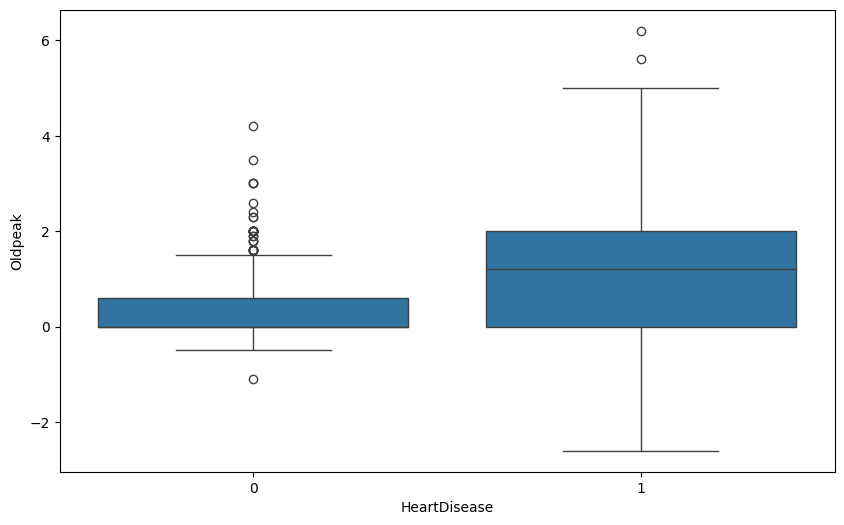

In [606]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='HeartDisease', y='Oldpeak')
plt.show()

Individuals with heart disease show higher Oldpeak (ST depression) values on average, confirming its diagnostic significance for ischemic changes.

## Part 4: Outlier Detection

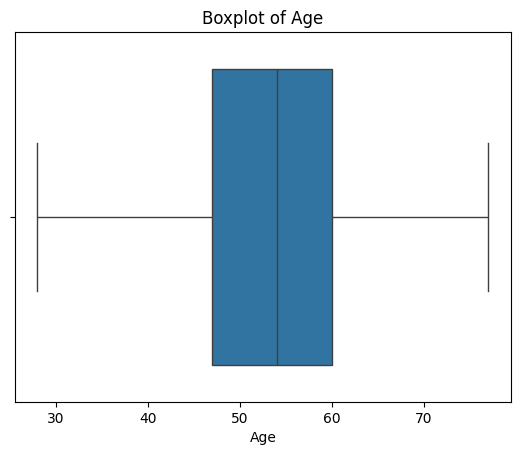

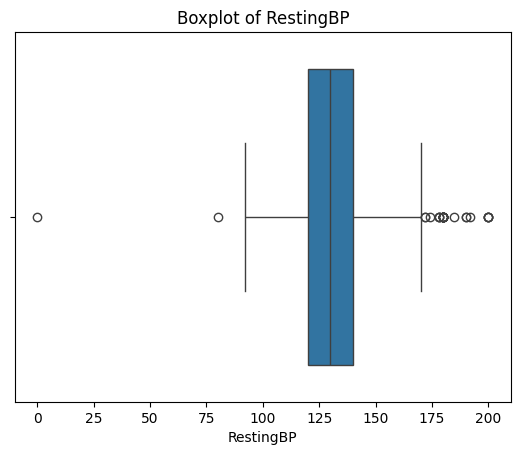

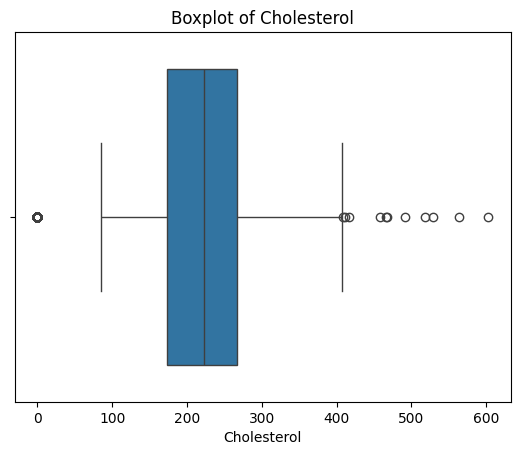

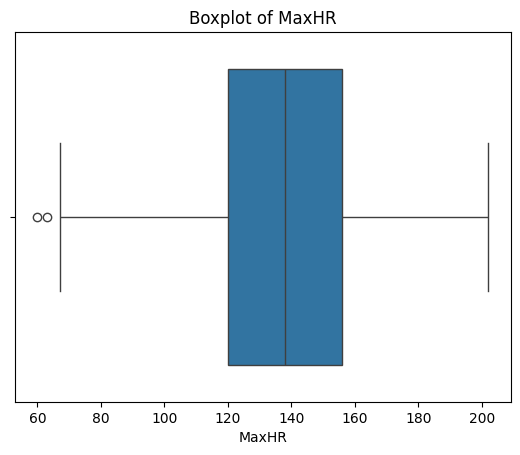

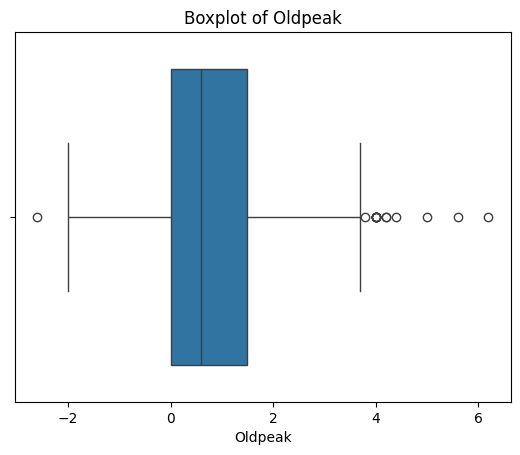

In [607]:
num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

From the boxplots, most numerical variables have values concentrated within reasonable clinical ranges. However, a few patients show abnormally low cholesterol or resting blood pressure values (e.g., 0 mg/dL or 0 mmHg), which are likely data entry errors or missing data encoded as zeros. These points will be addressed in the Data Cleaning step.

##Summary
The dataset contains 918 records with 11 predictor variables and 1 binary target (HeartDisease).

Numeric variables are mostly within plausible clinical ranges but include a few outliers (e.g., 0 cholesterol).

Distributions show slight skewness, especially in Cholesterol and Oldpeak.

Categorical features such as ChestPainType, ST_Slope, and ExerciseAngina are informative and likely related to heart disease presence.

Correlation and bivariate analyses identify MaxHR and Oldpeak as key variables associated with HeartDisease, while Age negatively influences MaxHR.

#Step 2: Data Processing

In [608]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin

# Target & columns
TARGET = "HeartDisease"

num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
cat_cols = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']

In [609]:
# Preprocess the data
# we split the dataset into train/test before fitting any imputers, scalers, or encoders.
# All cleaning/encoding steps are fit only on the training set and then applied to the test set.
X = df[num_cols + cat_cols].copy()
y = df[TARGET].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

##Part 1: Identify and handle missing values

In [610]:
X_train.isna().sum(), X_test.isna().sum()

(Age               0
 RestingBP         0
 Cholesterol       0
 MaxHR             0
 Oldpeak           0
 Sex               0
 ChestPainType     0
 FastingBS         0
 RestingECG        0
 ExerciseAngina    0
 ST_Slope          0
 dtype: int64,
 Age               0
 RestingBP         0
 Cholesterol       0
 MaxHR             0
 Oldpeak           0
 Sex               0
 ChestPainType     0
 FastingBS         0
 RestingECG        0
 ExerciseAngina    0
 ST_Slope          0
 dtype: int64)

The EDA revealed that several numerical variables, particularly Cholesterol and RestingBP, contained values of 0 (which are physically impossible and likely represent missing data or errors) and some extreme high values. Oldpeak also showed a right-skewed distribution with potential high outliers.

In [611]:
for col in ['RestingBP','Cholesterol']:
    for X_ in (X_train, X_test):
        X_.loc[X_[col] == 0, col] = np.nan

By replacing 0 with NaN, we will be handling the outliers in the next few parts

##Part 2: Categorical normalization

#### Choice of Categorical Feature Encoding

Categorical features were handled using a combination of One-Hot Encoding and Ordinal Encoding to transform them into a numerical format suitable for machine learning models while preserving their inherent information:

*   One-Hot Encoding with drop='first' (Sex, ChestPainType, RestingECG):
    *   For nominal (unordered) categorical variables like Sex, ChestPainType, and RestingECG, One-Hot Encoding was used.
    *   The drop='first' argument was applied to avoid multicollinearity. By dropping one category from each feature, the remaining columns provide the same information without creating a perfectly redundant linear dependency, which can cause issues in certain models.

*   Ordinal Encoding (ExerciseAngina, ST_Slope):
    *   For ordinal (ordered) categorical variables like ExerciseAngina and ST_Slope, Ordinal Encoding was used. This approach maintains the meaningful ranking of categories.
    *   ExerciseAngina was mapped as (N=0, Y=1) and ST_Slope was mapped based on its clinical progression (Down=0, Flat=1, Up=2).

In [612]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define feature groups based on their required transformations
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
onehot_features = ['ChestPainType', 'RestingECG'] # Sex handled separately for drop='first'
ordinal_features_exangina = ['ExerciseAngina'] # N=0, Y=1
ordinal_features_stslope = ['ST_Slope']       # Down=0, Flat=1, Up=2 (to match previous code's implied order)
passthrough_features = ['FastingBS']         # Already 0/1, no capping/scaling needed, just pass through

# Define preprocessing steps within pipelines
# Numerical pipeline: impute median, cap outliers, then scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('capper', IQRCapper(factor=1.5)),
])

# Categorical One-Hot pipeline: impute most frequent, then one-hot encode
onehot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first')) # Added drop='first' for other one-hot features
])

# Special one-hot for binary 'Sex' to avoid multicollinearity
sex_onehot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first')) # Drop first category to avoid multicollinearity
])

# Categorical Ordinal (ExerciseAngina): impute most frequent, then ordinal encode
ordinal_exangina_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['N', 'Y']])) # Map N to 0, Y to 1
])

# Categorical Ordinal (ST_Slope): impute most frequent, then ordinal encode
ordinal_stslope_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Down', 'Flat', 'Up']])) # Map Down to 0, Flat to 1, Up to 2
])

# Create a preprocessor using ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('ohe_sex', sex_onehot_transformer, ['Sex']), # Apply special one-hot for Sex
        ('ohe_other', onehot_transformer, onehot_features),
        ('ord_exangina', ordinal_exangina_transformer, ordinal_features_exangina),
        ('ord_stslope', ordinal_stslope_transformer, ordinal_features_stslope),
        ('pass', 'passthrough', passthrough_features)
    ],
    remainder='drop' # Drop any columns not specified (e.g., target variable if X contained it)
)

# The actual transformation will be applied in the next cell (vfHSuuh5IHv_)

## Part 3: Outlier handling

### Choice of Outlier Handling: IQR Capper (Winsorization)

For numerical features, outliers were handled using  Winsorization.

*   Methodology: The IQRCapper identifies outliers based on the Interquartile Range (IQR). Values falling below Q1 - (factor * IQR) or above Q3 + (factor * IQR) are 'capped' or 'Winsorized' by being replaced with the calculated lower or upper bound, respectively. This approach:
    *   Mitigates Extreme Influence: Reduces the impact of extreme values without removing them entirely, thus preserving the dataset's size.
    *   Maintains Data Distribution: Unlike deletion, capping maintains the overall shape of the distribution, albeit with truncated tails.
    *   Improves Model Robustness: Helps improve the robustness of machine learning models to these extreme values, especially models that are sensitive to outliers (e.g., linear models, neural networks).

In [613]:
class IQRCapper(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor
        self.lower_caps = {}
        self.upper_caps = {}

    def fit(self, X, y=None):
        # Check if X is a DataFrame or NumPy array
        if isinstance(X, pd.DataFrame):
            for col in X.columns:
                Q1 = X[col].quantile(0.25)
                Q3 = X[col].quantile(0.75)
                IQR = Q3 - Q1
                self.lower_caps[col] = Q1 - (self.factor * IQR)
                self.upper_caps[col] = Q3 + (self.factor * IQR)
        elif isinstance(X, np.ndarray):
            # If it's a NumPy array, iterate by index
            num_features = X.shape[1]
            for i in range(num_features):
                col_data = X[:, i]
                Q1 = np.quantile(col_data, 0.25)
                Q3 = np.quantile(col_data, 0.75)
                IQR = Q3 - Q1
                # Store caps with index as key
                self.lower_caps[i] = Q1 - (self.factor * IQR)
                self.upper_caps[i] = Q3 + (self.factor * IQR)
        else:
            raise TypeError("Input X must be a pandas DataFrame or numpy array.")
        return self

    def transform(self, X):
        X_capped = X.copy()
        if isinstance(X, pd.DataFrame):
            for col in X.columns:
                if col in self.lower_caps and col in self.upper_caps:
                    X_capped[col] = X_capped[col].clip(lower=self.lower_caps[col], upper=self.upper_caps[col])
        elif isinstance(X, np.ndarray):
            num_features = X.shape[1]
            for i in range(num_features):
                if i in self.lower_caps and i in self.upper_caps:
                    X_capped[:, i] = np.clip(X_capped[:, i], a_min=self.lower_caps[i], a_max=self.upper_caps[i])
        else:
            raise TypeError("Input X must be a pandas DataFrame or numpy array.")
        return X_capped

##Part 4: Integrate data cleaning into training set

In [614]:
# Apply the preprocessing using the ColumnTransformer
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Get column names after transformation for better readability
transformed_columns = []

# Numerical features
transformed_columns.extend(numerical_features)

# One-hot encoded 'Sex' (will only have one column due to drop='first')
sex_ohe_feature_names = preprocessor.named_transformers_['ohe_sex'].named_steps['onehot'].get_feature_names_out(['Sex'])
transformed_columns.extend(sex_ohe_feature_names)

# Other one-hot encoded features (now also with drop='first')
other_ohe_feature_names = preprocessor.named_transformers_['ohe_other'].named_steps['onehot'].get_feature_names_out(onehot_features)
transformed_columns.extend(other_ohe_feature_names)

# Ordinal encoded features
transformed_columns.extend(ordinal_features_exangina)
transformed_columns.extend(ordinal_features_stslope)

# Passthrough features
transformed_columns.extend(passthrough_features)

# Convert the transformed arrays back to DataFrames for easier inspection and further use
X_train_clean = pd.DataFrame(X_train_transformed, columns=transformed_columns, index=X_train.index)
X_test_clean = pd.DataFrame(X_test_transformed, columns=transformed_columns, index=X_test.index)

print("Train shape:", X_train_clean.shape)
print("Test shape:", X_test_clean.shape)
X_train_clean.head()

Train shape: (734, 14)
Test shape: (184, 14)


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina,ST_Slope,FastingBS
485,63.0,139.0,217.0,128.0,1.2,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
486,55.0,110.0,214.0,180.0,0.4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
117,59.0,130.0,338.0,130.0,1.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
361,47.0,160.0,238.0,124.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
296,50.0,145.0,238.0,139.0,0.7,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0


In [615]:
#Verify if anything is not encoded properly yet

X_train_clean['ST_Slope'].value_counts(dropna=False).sort_index()

X_train_clean.isna().sum().sum(), X_test_clean.isna().sum().sum()

(X_train_clean['RestingBP'] == 0).sum(), (X_test_clean['RestingBP'] == 0).sum()
(X_train_clean['Cholesterol'] == 0).sum(), (X_test_clean['Cholesterol'] == 0).sum()

for col in ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']:
    mn, mx = X_train_clean[col].min(), X_train_clean[col].max()
    print(f"{col}: {mn:.1f} – {mx:.1f}")

assert X_train_clean.isna().sum().sum() == 0
assert X_test_clean.isna().sum().sum() == 0
assert list(X_train_clean.columns) == list(X_test_clean.columns)

Age: 29.0 – 77.0
RestingBP: 92.0 – 172.5
Cholesterol: 132.9 – 351.9
MaxHR: 63.5 – 202.0
Oldpeak: -2.2 – 3.8


In [616]:
#Checking if any features has low variance
feature_variances = X_train_clean.var().sort_values()
print("Feature Variances in X_train_clean:")
print(feature_variances)

#Check if any feature has a variance lower than the threshold
variance_threshold = 0.01
low_variance_features = feature_variances[feature_variances < variance_threshold]

if not low_variance_features.empty:
    print(f"\nFeatures with variance below {variance_threshold}:")
    print(low_variance_features)
else:
    print(f"\nNo features found with variance below {variance_threshold}.")

Feature Variances in X_train_clean:
ChestPainType_TA        0.051596
ChestPainType_ATA       0.151161
RestingECG_ST           0.155408
Sex_M                   0.166805
ChestPainType_NAP       0.166805
FastingBS               0.176736
RestingECG_Normal       0.238446
ExerciseAngina          0.241998
ST_Slope                0.359621
Oldpeak                 1.056719
Age                    89.124439
RestingBP             295.204140
MaxHR                 666.495121
Cholesterol          2101.187602
dtype: float64

No features found with variance below 0.01.


There is no features have a variance below our set threshold of 0.05. This means all features have enough variability to potentially contribute meaningfully to the model

In [617]:
# Detect Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_clean.columns # Corrected: assign feature names, not the DataFrame itself
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
print(vif_data)

              Feature       VIF
0                 Age  1.414319
1           RestingBP  1.107415
2         Cholesterol  1.070088
3               MaxHR  1.529884
4             Oldpeak  1.533271
5               Sex_M  1.105226
6   ChestPainType_ATA  1.461661
7   ChestPainType_NAP  1.252583
8    ChestPainType_TA  1.122653
9   RestingECG_Normal  1.743390
10      RestingECG_ST  1.695777
11     ExerciseAngina  1.564867
12           ST_Slope  1.755493
13          FastingBS  1.117672


The result indicates no features shows multicollinearity that needs to be handled (all VIF are >1 but <2)

#Step 3: Feature Engineering

In the previous step, we have already done encoding all categorical values, and normalizing the numerical values. In this step, we will create new, meaningful features to improve model performance.

Tasks:
* Interaction features
* feature selection

#### Interaction Features
Two interaction features were created to capture clinically relevant relationships that may not be fully represented by the original variables alone:

* MaxHR_Age_Ratio (MaxHR/Age),
  * Maximum heart rate naturally declines with age, but the degree of decline varies among individuals depending on cardiovascular health and fitness. A high Age_MaxHR_Ratio indicates that for a given age, a patient achieves a lower peak heart rate during stress, which may reflect reduced cardiac reserve or chronotropic incompetence—both associated with underlying heart disease or poor exercise tolerance.
  * This ratio introduces a nonlinear relationship between age and exercise capacity that simple independent features might miss.
* Cholesterol_RestingBP_Product (Cholesterol*RestingBP).
  * Elevated cholesterol contributes to atherosclerosis, while high resting blood pressure adds hemodynamic stress on vessel walls. The interaction of these two risk factors magnifies cardiovascular strain, patients with both high cholesterol and high blood pressure are at significantly greater risk for ischemic heart disease than either condition alone.
  * The product term captures this effect, allowing the model to recognize that combined elevations in both variables may have a multiplicative rather than additive impact on heart disease likelihood.

I will implement these features by adding them to both `X_train_clean` and `X_test_clean` DataFrames. Afterwards, re-evaluate feature variances and VIF scores to check for multicollinearity.

In [618]:
X_train_clean['MaxHR_Age_Ratio'] = X_train_clean['MaxHR'] / X_train_clean['Age']
X_test_clean['MaxHR_Age_Ratio']  = X_test_clean['MaxHR'] / X_test_clean['Age']

X_train_clean['BP_Cholesterol_Product'] = X_train_clean['RestingBP'] * X_train_clean['Cholesterol']
X_test_clean['BP_Cholesterol_Product']  = X_test_clean['RestingBP'] * X_test_clean['Cholesterol']

print("New features added to X_train_clean:", X_train_clean.columns.tolist())
print("New features added to X_test_clean:", X_test_clean.columns.tolist())
print("X_train_clean head after adding new features:")
print(X_train_clean.head())

New features added to X_train_clean: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'MaxHR_Age_Ratio', 'BP_Cholesterol_Product']
New features added to X_test_clean: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'MaxHR_Age_Ratio', 'BP_Cholesterol_Product']
X_train_clean head after adding new features:
      Age  RestingBP  Cholesterol  MaxHR  Oldpeak  Sex_M  ChestPainType_ATA  \
485  63.0      139.0        217.0  128.0      1.2    1.0                1.0   
486  55.0      110.0        214.0  180.0      0.4    1.0                1.0   
117  59.0      130.0        338.0  130.0      1.5    0.0                0.0   
361  47.0      160.0        238.0  124.0      0.0    1.0   

#### Choice of Feature Scaling: Min-Max Normalization

For numerical features, Min-Max Normalization (Rescaling) was chosen over StandardScaler. This decision is particularly beneficial if the dataset is intended for use with Artificial Neural Networks (ANNs).

Reasons for choosing Min-Max Normalization:

*   Activation Function Compatibility: ANN normally requires input to be within a specific range. Scaling input features to a similar range (typically 0 to 1 with Min-Max) can help prevent these activation functions from saturating too early.
*   Improved Convergence: By bringing all feature values into a consistent, small range, Min-Max normalization often leads to faster and more stable convergence during the training of ANNs.

Since outliers were already addressed using the IQRCapper, the primary drawback of Min-Max scaling (its sensitivity to extreme values) is minimized, making it a suitable and often preferred choice for ANN algorithms.

To ensure consistent scaling across all features, including newly engineered ones, MinMax scaling was applied after feature creation.
This step guarantees that ratio and product features share a comparable scale with existing numeric variables, improving model stability and variance consistency.

In [619]:
# apply scaling (MinMaxScaler) to all numeric features
from sklearn.preprocessing import MinMaxScaler

# Identify numeric columns
numeric_cols = X_train_clean.select_dtypes(include=['float64', 'int64']).columns

# Fit scaler on training set and transform both
scaler = MinMaxScaler()
X_train_clean[numeric_cols] = scaler.fit_transform(X_train_clean[numeric_cols])
X_test_clean[numeric_cols] = scaler.transform(X_test_clean[numeric_cols])

X_test_clean.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina,ST_Slope,FastingBS,MaxHR_Age_Ratio,BP_Cholesterol_Product
356,0.354167,0.285714,0.480023,0.357401,0.625000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.5,0.0,0.240238,0.312446
763,0.604167,0.496894,0.416096,0.790614,0.908333,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.328909,0.357790
817,0.645833,0.409938,0.571347,0.559567,0.841667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.222289,0.413119
735,0.416667,0.347826,0.251712,0.545126,0.708333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.5,0.0,0.304304,0.213218
892,0.208333,0.571429,0.397831,0.638989,0.375000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.5,0.0,0.483031,0.374129


In [620]:
# Verify if the newly added features has a high enough variance
feature_variances = X_train_clean.var().sort_values()
print("Feature Variances in X_train_clean:")
print(feature_variances)

#Check if any feature has a variance lower than the threshold
variance_threshold = 0.01
low_variance_features = feature_variances[feature_variances < variance_threshold]

if not low_variance_features.empty:
    print(f"\nFeatures with variance below {variance_threshold}:")
    print(low_variance_features)
else:
    print(f"\nNo features found with variance below {variance_threshold}.")

Feature Variances in X_train_clean:
MaxHR_Age_Ratio           0.022354
BP_Cholesterol_Product    0.026076
Oldpeak                   0.029353
MaxHR                     0.034745
Age                       0.038682
Cholesterol               0.043810
RestingBP                 0.045554
ChestPainType_TA          0.051596
ST_Slope                  0.089905
ChestPainType_ATA         0.151161
RestingECG_ST             0.155408
Sex_M                     0.166805
ChestPainType_NAP         0.166805
FastingBS                 0.176736
RestingECG_Normal         0.238446
ExerciseAngina            0.241998
dtype: float64

No features found with variance below 0.01.


#### Feature Selection

Multiple feature selection strategies were applied to refine the dataset:

* Low Variance Removal: Features with minimal variation (<0.01) were removed. From our previous examinations, there shouldn't be any feature with a variance lower than 0.01

* Correlation Filtering: Highly correlated features (r > 0.9) were pruned to reduce redundancy.

These combined methods ensure that the final feature set retains high predictive value while avoiding multicollinearity and overfitting.

In [621]:
from sklearn.feature_selection import VarianceThreshold

# Remove features with variance below a small threshold
sel = VarianceThreshold(threshold=0.01)
sel.fit(X_train_clean)

# Keep only high-variance columns
selected_features = X_train_clean.columns[sel.get_support()]
X_train_fs = X_train_clean[selected_features]
X_test_fs = X_test_clean[selected_features]

print("Removed low-variance features. Remaining features:", len(selected_features))

Removed low-variance features. Remaining features: 16


In [622]:
# remove highly correlated (redundant) features
corr_matrix = X_train_fs.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print("Highly correlated features:", high_corr_features)

X_train_fs = X_train_fs.drop(columns=high_corr_features)
X_test_fs = X_test_fs.drop(columns=high_corr_features)

Highly correlated features: []
